In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.close("all")

In [45]:
df=pd.read_csv(r"C:\Users\User\Desktop\JP Morgan\Nat_Gas.csv") # Path to csv file
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [74]:
df['Dates'] = pd.to_datetime(df['Dates'])
df.head()

,Dates,Prices,date_num
0,2020-10-31,10.1,0
1,2020-11-30,10.3,30
2,2020-12-31,11.0,61
3,2021-01-31,10.9,92
4,2021-02-28,10.9,120


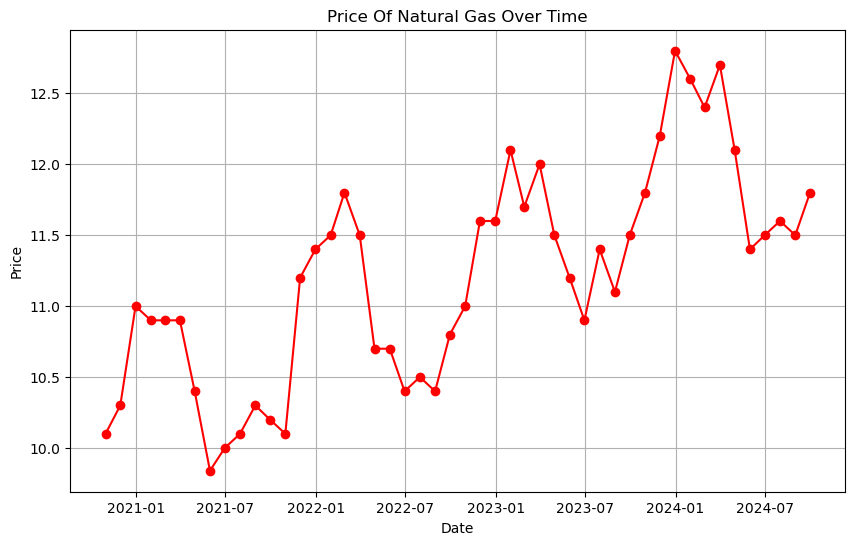

In [47]:
plt.figure(figsize=(10, 6))
plt.title('Price Of Natural Gas Over Time') 
plt.xlabel('Date')  
plt.ylabel('Price') 
plt.plot(df['Dates'], df['Prices'], marker='o', color='r')
plt.grid()
plt.show()

In [76]:
# Converting dates to a numerical format which is needed for linear regression
df['date_num'] = (df['Dates'] - df['Dates'].min()).dt.days
df.head()

,Dates,Prices,date_num
0,2020-10-31,10.1,0
1,2020-11-30,10.3,30
2,2020-12-31,11.0,61
3,2021-01-31,10.9,92
4,2021-02-28,10.9,120


In [79]:
X = df[['date_num']]
y = df['Prices']
X = X.values
y = y.values

In [69]:
model=LinearRegression()
model.fit(X, y)

LinearRegression()

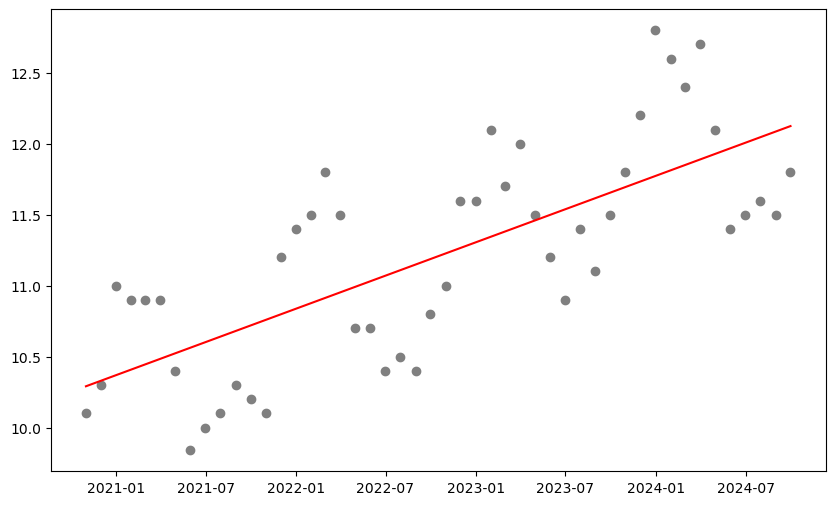

In [70]:
# Visualizing the fit
plt.figure(figsize=(10, 6))
plt.scatter(df['Dates'], y, color='gray', label='Actual prices')  # Actual data points
plt.plot(df['Dates'], model.predict(X), color='red', label='Model fit')  # Model predictions

In [71]:
def estimate_price (date): 
    
    date=pd.to_datetime(date)
    date_num =(date - df['Dates'].min()).days
    price_predicted=model.predict([[date_num]])
    return price_predicted[0]

In [72]:
estimate_price("11/30/21")

10.797578697462567

In [73]:
estimate_price("11/30/2024")

12.20306016170377